# References

## Data
* shape file https://data.humdata.org/dataset/cod-ab-jpn
* Current Population Estimates as of October 1, 2022 https://www.stat.go.jp/english/data/jinsui/2022np/

## python module
* GeoPandas https://geopandas.org/en/stable/index.html

# Download a zipfile containing shapefiles and extract it

In [1]:
import requests
from io import BytesIO
from zipfile import ZipFile
import os

# URL of the zip file
url = "https://data.humdata.org/dataset/6ba099c6-350b-4711-9a65-d85a1c5e519c/resource/f82faadf-a608-42cf-ae15-75ce672d7e69/download/jpn_adm_2019_shp.zip"

# Define the download path
download_path = "jpn_adm_2019_shp.zip"

# Define the extraction directory
extracted_dir = "jpn_adm_2019_shp"
current_dir = os.getcwd()

# Download the file
if not os.path.exists(download_path):
    response = requests.get(url)
    with open(download_path, 'wb') as f:
        f.write(response.content)
        print(f"Downloaded {download_path}")

# Extract the contents of the zip file
if not os.path.os.path.exists(extracted_dir):
    with ZipFile(download_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)
    print(f"Extracted contents to: {extracted_dir}")
else:
    print(f"The directory '{extracted_dir}' already exists.")
    
# Print a message indicating the download and extraction are complete
print(f"Download and extraction complete. Files are in the 'jpn_adm_2019_shp' directory.\n")
print("current directory: \n" , os.listdir(current_dir), "\n")
print("extracted directory: \n", os.listdir(extracted_dir) )

The directory 'jpn_adm_2019_shp' already exists.
Download and extraction complete. Files are in the 'jpn_adm_2019_shp' directory.

current directory: 
 ['.ipynb_checkpoints', 'geopandas_example.ipynb', 'geopandas_example.py', 'japanese_cities.svg', 'japanese_prefectures.svg', 'japan_geojson.json', 'japan_map.ipynb', 'japan_map.svg', 'jpn_adm_2019_shp', 'jpn_adm_2019_shp.zip', 'map_with_text.svg', 'world.svg', 'world_map.svg'] 

extracted directory: 
 ['JPN COD-AB datasheet 2019_12_19.pdf', 'jpn_admbnda_adm0_2019.cpg', 'jpn_admbnda_adm0_2019.dbf', 'jpn_admbnda_adm0_2019.prj', 'jpn_admbnda_adm0_2019.sbn', 'jpn_admbnda_adm0_2019.sbx', 'jpn_admbnda_adm0_2019.shp', 'jpn_admbnda_adm0_2019.shp.xml', 'jpn_admbnda_adm0_2019.shx', 'jpn_admbnda_adm1_2019.cpg', 'jpn_admbnda_adm1_2019.dbf', 'jpn_admbnda_adm1_2019.prj', 'jpn_admbnda_adm1_2019.sbn', 'jpn_admbnda_adm1_2019.sbx', 'jpn_admbnda_adm1_2019.shp', 'jpn_admbnda_adm1_2019.shp.xml', 'jpn_admbnda_adm1_2019.shx', 'jpn_admbnda_adm2_2019.cpg', 'jpn

# matplotlib setting

In [2]:
import matplotlib
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams["font.family"] = "sans-serif"
matplotlib.use("SVG") 

# My plot function

In [3]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import geodatasets
from geodatasets import get_path

def plot(gdf, title="", save_filename=None, axis_off=False):
    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.2)
    ax.set_title(title)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Remove axes
    if axis_off:
        ax.axis('off')

    # save figure
    if save_filename:
        filename, extension = os.path.splitext(save_filename)
        extension = extension[1:]
        current_dir = os.getcwd()
        save_file_path = fr"{current_dir}/{save_filename}"
        fig.savefig(save_file_path, format=extension)
    
    return fig, ax


# Plot the map of Japan

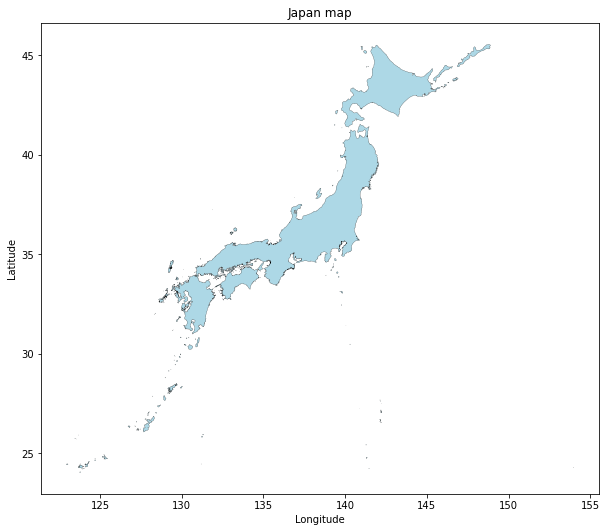

In [4]:
japan_shape_file_path = fr'{extracted_dir}/jpn_admbnda_adm0_2019.shp'
japan_gdf = gpd.read_file(japan_shape_file_path)
fig, ax = plot(japan_gdf, "Japan map", "japan_map.svg")
fig

In [5]:
type(japan_gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
# Save the GeoDataFrame to GeoJSON
output_geojson_path = os.path.join(current_dir, "japan_geojson.json") 
japan_gdf.to_file(output_geojson_path, driver='GeoJSON')

# Clip

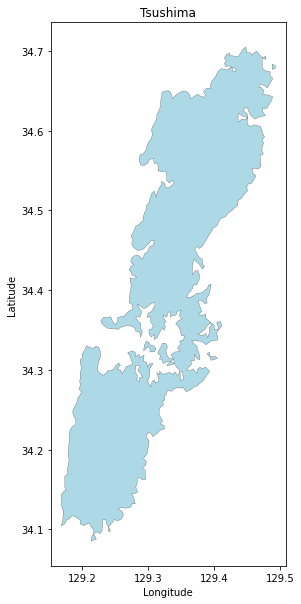

In [7]:
tsushima = japan_gdf.clip([128, 34, 130, 35])
fig, ax = plot(tsushima, "Tsushima")
fig

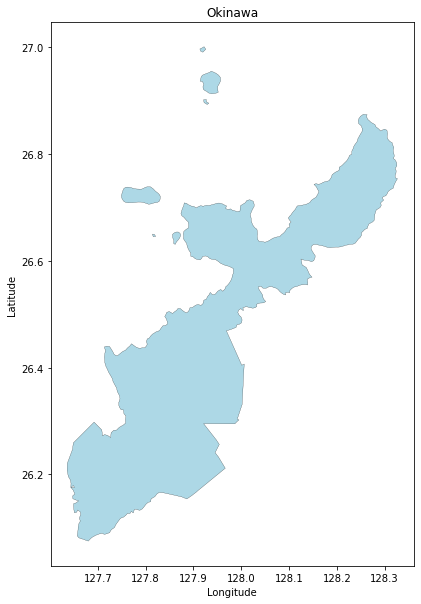

In [8]:
okinawa_gdf =  japan_gdf.clip([127.5, 25, 129, 27])
fig, ax = plot(okinawa_gdf, "Okinawa")
fig

# Plot prefectures

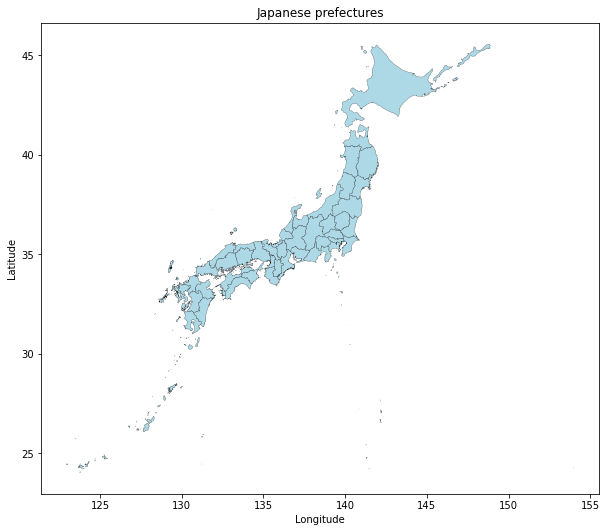

In [9]:
prefectures_shape_file_path = fr'{extracted_dir}/jpn_admbnda_adm1_2019.shp'
prefectures_gdf = gpd.read_file(prefectures_shape_file_path)
fig, ax = plot(prefectures_gdf, "Japanese prefectures", "japanese_prefectures.svg", False)
fig

In [10]:
type(prefectures_gdf)

geopandas.geodataframe.GeoDataFrame

In [11]:
prefectures_gdf

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,geometry
0,Japan,日本,JP,Aichi,愛知県,JP23,"MULTIPOLYGON (((137.00719 34.67810, 137.00506 ..."
1,Japan,日本,JP,Akita,秋田県,JP05,"MULTIPOLYGON (((139.87633 39.11970, 139.86987 ..."
2,Japan,日本,JP,Aomori,青森県,JP02,"MULTIPOLYGON (((141.52791 40.54101, 141.52423 ..."
3,Japan,日本,JP,Chiba,千葉県,JP12,"MULTIPOLYGON (((140.11286 35.57128, 140.10691 ..."
4,Japan,日本,JP,Ehime,愛媛県,JP38,"MULTIPOLYGON (((132.55887 32.93409, 132.56388 ..."
5,Japan,日本,JP,Fukui,福井県,JP18,"MULTIPOLYGON (((136.06653 35.66446, 136.06244 ..."
6,Japan,日本,JP,Fukuoka,福岡県,JP40,"MULTIPOLYGON (((130.13217 33.55678, 130.12714 ..."
7,Japan,日本,JP,Fukushima,福島県,JP07,"MULTIPOLYGON (((140.94816 37.85372, 140.94980 ..."
8,Japan,日本,JP,Gifu,岐阜県,JP21,"POLYGON ((137.29364 36.45964, 137.29900 36.458..."
9,Japan,日本,JP,Gunma,群馬県,JP10,"POLYGON ((139.17773 36.98512, 139.17650 36.980..."


In [12]:
# You may notice that each ADM1_EN value has non-breaking space character at the beginning 
prefectures_gdf['ADM1_EN'].tolist()

['\xa0Aichi',
 '\xa0Akita',
 '\xa0Aomori',
 '\xa0Chiba',
 '\xa0Ehime',
 '\xa0Fukui',
 '\xa0Fukuoka',
 '\xa0Fukushima',
 '\xa0Gifu',
 '\xa0Gunma',
 '\xa0Hiroshima',
 '\xa0Hokkaido',
 '\xa0Hyōgo',
 '\xa0Ibaraki',
 '\xa0Ishikawa',
 '\xa0Iwate',
 '\xa0Kagawa',
 '\xa0Kagoshima',
 '\xa0Kanagawa',
 '\xa0Kōchi',
 '\xa0Kumamoto',
 '\xa0Kyoto',
 '\xa0Mie',
 '\xa0Miyagi',
 '\xa0Miyazaki',
 '\xa0Nagano',
 '\xa0Nagasaki',
 '\xa0Nara',
 '\xa0Niigata',
 '\xa0Ōita',
 '\xa0Okayama',
 '\xa0Okinawa',
 '\xa0Osaka',
 '\xa0Saga',
 '\xa0Saitama',
 '\xa0Shiga',
 '\xa0Shimane',
 '\xa0Shizuoka',
 '\xa0Tochigi',
 '\xa0Tokushima',
 '\xa0Tokyo',
 '\xa0Tottori',
 '\xa0Toyama',
 '\xa0Wakayama',
 '\xa0Yamagata',
 '\xa0Yamaguchi',
 '\xa0Yamanashi']

In [13]:
# remove white spaces from prefectures
prefectures_gdf['ADM1_EN'] = prefectures_gdf['ADM1_EN'].str.strip()
prefectures_gdf['ADM1_EN'].tolist()

['Aichi',
 'Akita',
 'Aomori',
 'Chiba',
 'Ehime',
 'Fukui',
 'Fukuoka',
 'Fukushima',
 'Gifu',
 'Gunma',
 'Hiroshima',
 'Hokkaido',
 'Hyōgo',
 'Ibaraki',
 'Ishikawa',
 'Iwate',
 'Kagawa',
 'Kagoshima',
 'Kanagawa',
 'Kōchi',
 'Kumamoto',
 'Kyoto',
 'Mie',
 'Miyagi',
 'Miyazaki',
 'Nagano',
 'Nagasaki',
 'Nara',
 'Niigata',
 'Ōita',
 'Okayama',
 'Okinawa',
 'Osaka',
 'Saga',
 'Saitama',
 'Shiga',
 'Shimane',
 'Shizuoka',
 'Tochigi',
 'Tokushima',
 'Tokyo',
 'Tottori',
 'Toyama',
 'Wakayama',
 'Yamagata',
 'Yamaguchi',
 'Yamanashi']

In [14]:
# remove accents (e.g. ō -> o)
from unidecode import unidecode

prefectures_gdf['ADM1_EN'] = prefectures_gdf['ADM1_EN'].apply(lambda x: unidecode(x))
prefectures_gdf['ADM1_EN'].tolist()

['Aichi',
 'Akita',
 'Aomori',
 'Chiba',
 'Ehime',
 'Fukui',
 'Fukuoka',
 'Fukushima',
 'Gifu',
 'Gunma',
 'Hiroshima',
 'Hokkaido',
 'Hyogo',
 'Ibaraki',
 'Ishikawa',
 'Iwate',
 'Kagawa',
 'Kagoshima',
 'Kanagawa',
 'Kochi',
 'Kumamoto',
 'Kyoto',
 'Mie',
 'Miyagi',
 'Miyazaki',
 'Nagano',
 'Nagasaki',
 'Nara',
 'Niigata',
 'Oita',
 'Okayama',
 'Okinawa',
 'Osaka',
 'Saga',
 'Saitama',
 'Shiga',
 'Shimane',
 'Shizuoka',
 'Tochigi',
 'Tokushima',
 'Tokyo',
 'Tottori',
 'Toyama',
 'Wakayama',
 'Yamagata',
 'Yamaguchi',
 'Yamanashi']

In [15]:
type(prefectures_gdf.geometry[46])

shapely.geometry.polygon.Polygon

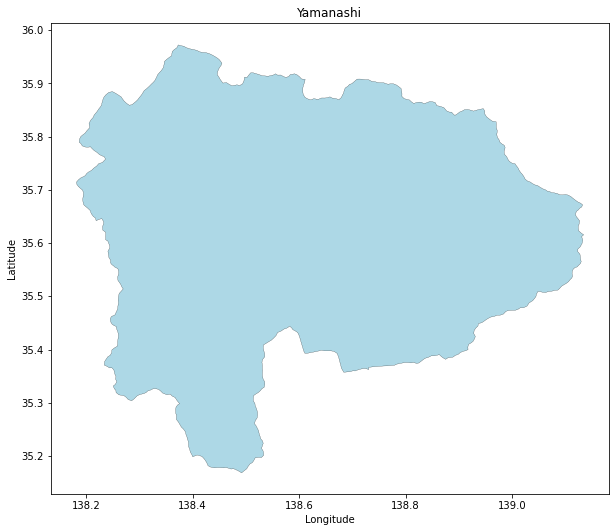

In [16]:
yamanashi = prefectures_gdf.geometry[46] 
yamanashi_gdf = gpd.GeoDataFrame(geometry=[yamanashi])
fig, ax = plot(yamanashi_gdf, "Yamanashi")
fig

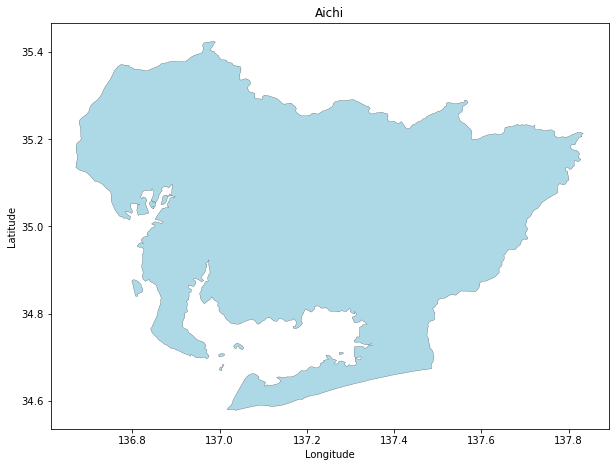

In [17]:
index_aichi = prefectures_gdf[prefectures_gdf['ADM1_EN'].str.lower().str.contains('aichi')].index.max()
aichi = prefectures_gdf.geometry[index_aichi]
aichi_gdf = gpd.GeoDataFrame(geometry=[aichi])
fig, ax = plot(aichi_gdf, "Aichi")
fig

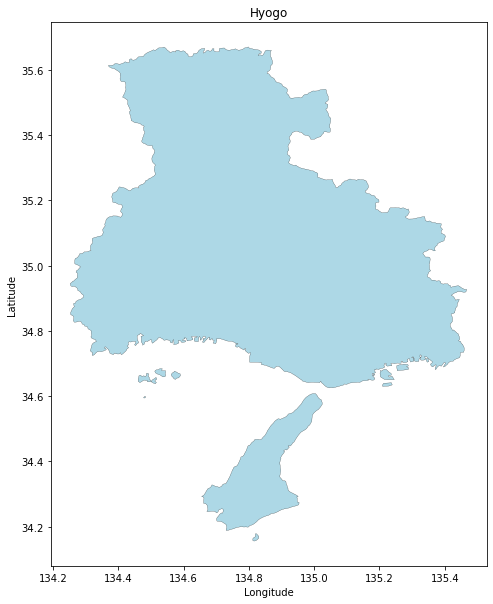

In [18]:
from unidecode import unidecode

index_hyogo = prefectures_gdf[prefectures_gdf['ADM1_EN'].str.lower().str.contains('hyogo') ].index.max()
hyogo = prefectures_gdf.geometry[index_hyogo]
hyogo_gdf = gpd.GeoDataFrame(geometry=[hyogo])
fig, ax = plot(hyogo_gdf, "Hyogo")
fig

In [19]:
type(prefectures_gdf['ADM1_EN'].str)

pandas.core.strings.accessor.StringMethods

In [20]:
type(prefectures_gdf['ADM1_EN'].str.lower())

pandas.core.series.Series

In [21]:
type(prefectures_gdf['ADM1_EN'].str.lower().str.contains('hyogo'))

pandas.core.series.Series

# Japanese cities

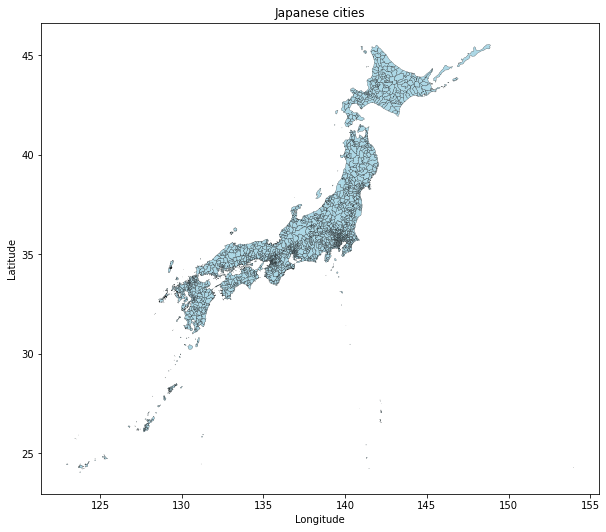

In [22]:
japanese_cities_shape_file_path = fr'{extracted_dir}/jpn_admbnda_adm2_2019.shp'
cities_gdf = gpd.read_file(japanese_cities_shape_file_path)
fig, ax = plot(cities_gdf, "Japanese cities", "japanese_cities.svg")
fig

In [23]:
type(cities_gdf)

geopandas.geodataframe.GeoDataFrame

In [24]:
cities_gdf

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,ADM2_JA,ADM2_EN,ADM2_PCODE,geometry
0,Japan,日本,JP,Hokkaido,北海道,JP01,えりも町,Erimo Town,JP01001,"POLYGON ((143.19987 42.19022, 143.20496 42.188..."
1,Japan,日本,JP,Hokkaido,北海道,JP01,せたな町,Setana Town,JP01002,"POLYGON ((139.91276 42.61533, 139.91683 42.612..."
2,Japan,日本,JP,Hokkaido,北海道,JP01,ニセコ町,Niseko,JP01003,"POLYGON ((140.64881 42.87756, 140.65468 42.876..."
3,Japan,日本,JP,Hokkaido,北海道,JP01,むかわ町,Mukawa,JP01004,"POLYGON ((142.28130 42.98198, 142.28125 42.976..."
4,Japan,日本,JP,Hokkaido,北海道,JP01,七飯町,Nanae,JP01005,"POLYGON ((140.70360 42.05080, 140.71018 42.049..."
...,...,...,...,...,...,...,...,...,...,...
1887,Japan,日本,JP,Okinawa,沖縄県,JP47,西原町,Nishihara-cho,JP47037,"POLYGON ((127.76880 26.25360, 127.76587 26.248..."
1888,Japan,日本,JP,Okinawa,沖縄県,JP47,読谷村,Yomitan-son,JP47038,"POLYGON ((127.74072 26.42195, 127.74498 26.418..."
1889,Japan,日本,JP,Okinawa,沖縄県,JP47,豊見城市,Tomigusuku City,JP47039,"POLYGON ((127.68963 26.19442, 127.69544 26.195..."
1890,Japan,日本,JP,Okinawa,沖縄県,JP47,那覇市,Naha City,JP47040,"POLYGON ((127.65455 26.24646, 127.66983 26.246..."


In [25]:
type(cities_gdf)

geopandas.geodataframe.GeoDataFrame

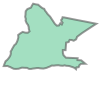

In [26]:
index_niseko = cities_gdf[cities_gdf['ADM2_EN'].str.lower() == 'niseko'].index.max() # 2
cities_gdf.geometry[index_niseko] # polygon

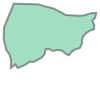

In [27]:
index_naha = cities_gdf[cities_gdf['ADM2_EN'] == 'Naha City'].index.max() # 1890
cities_gdf.geometry[index_naha] # polygon

In [28]:
indices_sado = cities_gdf[cities_gdf['ADM2_EN'].str.lower().str.contains('sado')].index
indices_sado

Index([776], dtype='int64')

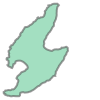

In [29]:
cities_gdf.geometry[indices_sado[0]] # polygon

# male to female ratio by prefectures

In [30]:
import pandas as pd
from io import StringIO

data = """
prefecture,male2female
Hokkaido,89.4
Aomori,89.2
Iwate,93.3
Miyagi,95.2
Akita,89.5
Yamagata,94.1
Fukushima,97.6
Ibaraki,99.7
Tochigi,99.6
Gunma,98.0
Saitama,98.6
Chiba,98.2
Tokyo,96.4
Kanagawa,98.4
Niigata,94.5
Toyama,94.8
Ishikawa,94.4
Fukui,95.6
Yamanashi,96.6
Nagano,95.7
Gifu,94.4
Shizuoka,97.3
Aichi,99.3
Mie,95.6
Shiga,97.4
Kyoto,91.3
Osaka,91.7
Hyogo,90.5
Nara,88.9
Wakayama,89.2
Tottori,91.7
Shimane,93.8
Okayama,92.7
Hiroshima,94.1
Yamaguchi,90.6
Tokushima,91.5
Kagawa,93.5
Ehime,90.4
Kochi,89.7
Fukuoka,90.0
Saga,90.3
Nagasaki,88.9
Kumamoto,90.1
Oita,90.6
Miyazaki,89.5
Kagoshima,89.5
Okinawa,96.9
"""

sex_ratio_df = pd.read_csv(StringIO(data))
sex_ratio_df['prefecture'] = sex_ratio_df['prefecture'].str.strip()
sex_ratio_df

,prefecture,male2female
0,Hokkaido,89.4
1,Aomori,89.2
2,Iwate,93.3
3,Miyagi,95.2
4,Akita,89.5
5,Yamagata,94.1
6,Fukushima,97.6
7,Ibaraki,99.7
8,Tochigi,99.6
9,Gunma,98.0


In [31]:
from unidecode import unidecode 

prefectures_shape_file_path = fr'{extracted_dir}\jpn_admbnda_adm1_2019.shp'
gdf = gpd.read_file(prefectures_shape_file_path)

# remove white spaces and accents
gdf['prefecture'] = gdf['ADM1_EN'].str.strip().apply(lambda x: unidecode(x))
gdf

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,geometry,prefecture
0,Japan,日本,JP,Aichi,愛知県,JP23,"MULTIPOLYGON (((137.00719 34.67810, 137.00506 ...",Aichi
1,Japan,日本,JP,Akita,秋田県,JP05,"MULTIPOLYGON (((139.87633 39.11970, 139.86987 ...",Akita
2,Japan,日本,JP,Aomori,青森県,JP02,"MULTIPOLYGON (((141.52791 40.54101, 141.52423 ...",Aomori
3,Japan,日本,JP,Chiba,千葉県,JP12,"MULTIPOLYGON (((140.11286 35.57128, 140.10691 ...",Chiba
4,Japan,日本,JP,Ehime,愛媛県,JP38,"MULTIPOLYGON (((132.55887 32.93409, 132.56388 ...",Ehime
5,Japan,日本,JP,Fukui,福井県,JP18,"MULTIPOLYGON (((136.06653 35.66446, 136.06244 ...",Fukui
6,Japan,日本,JP,Fukuoka,福岡県,JP40,"MULTIPOLYGON (((130.13217 33.55678, 130.12714 ...",Fukuoka
7,Japan,日本,JP,Fukushima,福島県,JP07,"MULTIPOLYGON (((140.94816 37.85372, 140.94980 ...",Fukushima
8,Japan,日本,JP,Gifu,岐阜県,JP21,"POLYGON ((137.29364 36.45964, 137.29900 36.458...",Gifu
9,Japan,日本,JP,Gunma,群馬県,JP10,"POLYGON ((139.17773 36.98512, 139.17650 36.980...",Gunma


In [32]:
merged_data = gdf.merge(sex_ratio_df, how='left', left_on='prefecture', right_on='prefecture')
merged_data

,ADM0_EN,ADM0_JA,ADM0_PCODE,ADM1_EN,ADM1_JA,ADM1_PCODE,geometry,prefecture,male2female
0,Japan,日本,JP,Aichi,愛知県,JP23,"MULTIPOLYGON (((137.00719 34.67810, 137.00506 ...",Aichi,99.3
1,Japan,日本,JP,Akita,秋田県,JP05,"MULTIPOLYGON (((139.87633 39.11970, 139.86987 ...",Akita,89.5
2,Japan,日本,JP,Aomori,青森県,JP02,"MULTIPOLYGON (((141.52791 40.54101, 141.52423 ...",Aomori,89.2
3,Japan,日本,JP,Chiba,千葉県,JP12,"MULTIPOLYGON (((140.11286 35.57128, 140.10691 ...",Chiba,98.2
4,Japan,日本,JP,Ehime,愛媛県,JP38,"MULTIPOLYGON (((132.55887 32.93409, 132.56388 ...",Ehime,90.4
5,Japan,日本,JP,Fukui,福井県,JP18,"MULTIPOLYGON (((136.06653 35.66446, 136.06244 ...",Fukui,95.6
6,Japan,日本,JP,Fukuoka,福岡県,JP40,"MULTIPOLYGON (((130.13217 33.55678, 130.12714 ...",Fukuoka,90.0
7,Japan,日本,JP,Fukushima,福島県,JP07,"MULTIPOLYGON (((140.94816 37.85372, 140.94980 ...",Fukushima,97.6
8,Japan,日本,JP,Gifu,岐阜県,JP21,"POLYGON ((137.29364 36.45964, 137.29900 36.458...",Gifu,94.4
9,Japan,日本,JP,Gunma,群馬県,JP10,"POLYGON ((139.17773 36.98512, 139.17650 36.980...",Gunma,98.0


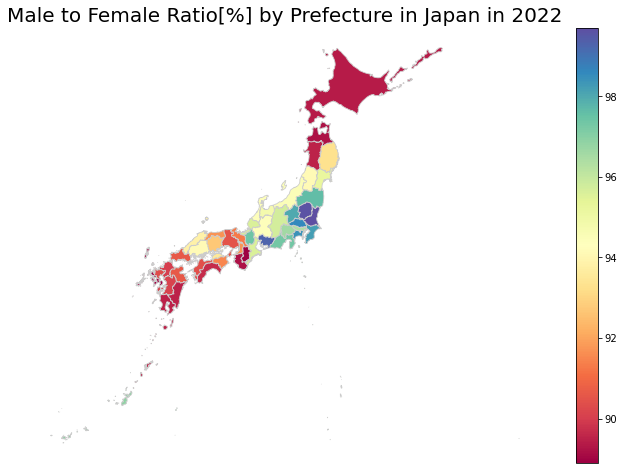

In [33]:
# Plot the map if merging is successful
if 'male2female' in merged_data.columns:
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    merged_data.plot(column='male2female', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Remove axes
    ax.axis(False)
    
    # Add title and show the plot
    ax.set_title('Male to Female Ratio[%] by Prefecture in Japan in 2022', fontsize=20)
else:
    print("Merging unsuccessful. Check 'prefecture' values for consistency.")

fig